In [2]:
import pandas as pd
import pickle
import os
## change directory for file
# os.chdir('data')

In [147]:
with open('ca_yrs_df.pickle','rb') as read_file:
    ca_yrs_df = pickle.load(read_file)

## Data Setup
* change index
* create daily, weekly, and monthly visualizations

In [148]:
# change index to date columns
ca_yrs_df.set_index('datetime',inplace=True)

In [12]:
ca_yrs_df[ca_yrs_df['dep_delay'] < 0]

,carrier,origin,dep_delay
datetime,,,
2018-12-23 06:15:00,UA,LAX,-3.0
2018-12-23 08:10:00,UA,LAX,-2.0
2018-12-23 06:00:00,UA,SFO,-7.0
2018-12-23 11:40:00,UA,LAX,-5.0
2018-12-23 19:55:00,UA,SFO,-5.0
...,...,...,...
2018-09-30 15:13:00,B6,LAX,-2.0
2018-09-30 16:43:00,B6,LAX,-1.0
2018-09-30 09:00:00,B6,SFO,-11.0


In [149]:
# group delays by average daily
daily_avg_delay = ca_yrs_df.dep_delay.resample('D').mean()

In [45]:
# turn filter into a dataframe
total_data = pd.DataFrame(weekly_avg_delay)

In [89]:
# train data with a selected time from of 01/01/2017 to 10/21/2018
train_data = total_data.loc['2017-01-01':'2018-10-21',:]
train_data

,dep_delay
datetime,
2017-01-01,16.791089
2017-01-08,32.387130
2017-01-15,18.604747
2017-01-22,18.421241
2017-01-29,8.387463
...,...
2018-09-23,4.871771
2018-09-30,7.739974
2018-10-07,5.354344


In [99]:
# create test data with data from 10/21/2018 to 1/06/2019
test_data = total_data.loc['2018-10-21':'2019-01-06 ',:]

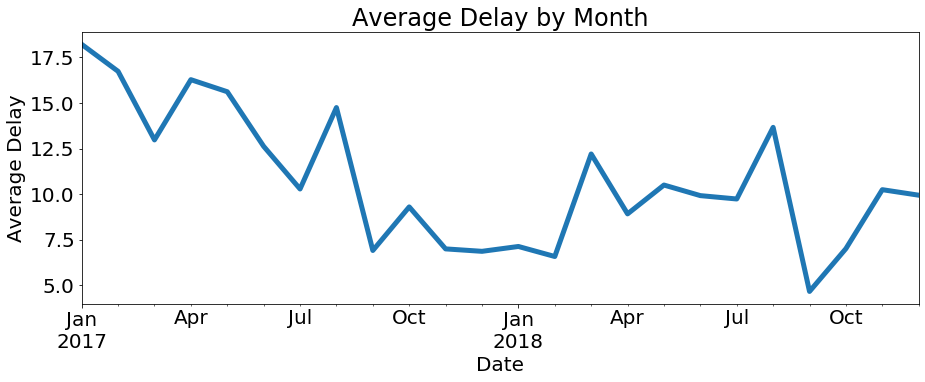

In [141]:
# visualize monthly delays
monthly_avg_delay = ca_yrs_df.dep_delay.resample('M').mean()
monthly_avg_delay.plot(figsize=(15,5), linewidth=5.0)
plt.xlabel('Date')
plt.ylabel('Average Delay')
plt.title('Average Delay by Month')
plt.rcParams.update({'font.size': 18})
plt.savefig('avgdelayMonth.svg', format='svg', transparent=True)
plt.show();

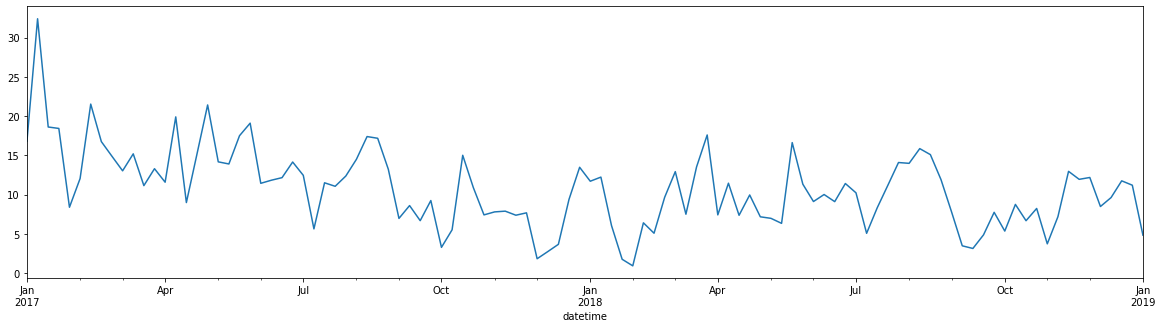

In [25]:
# visualize weekly delays
weekly_avg_delay = ca_yrs_df.dep_delay.resample('W').mean()
weekly_avg_delay.plot(figsize=(20,5));

In [88]:
weekly_avg_delay.head(95)

datetime
2017-01-01    16.791089
2017-01-08    32.387130
2017-01-15    18.604747
2017-01-22    18.421241
2017-01-29     8.387463
                ...    
2018-09-23     4.871771
2018-09-30     7.739974
2018-10-07     5.354344
2018-10-14     8.746489
2018-10-21     6.673417
Freq: W-SUN, Name: dep_delay, Length: 95, dtype: float64

In [20]:
ca_yrs_df['dep_delay'] - ca_yrs_df['dep_delay'].min() + 1

datetime
2018-12-23 06:15:00    47.0
2018-12-23 08:10:00    48.0
2018-12-23 17:15:00    77.0
2018-12-23 17:49:00    69.0
2018-12-23 06:00:00    43.0
                       ... 
2018-09-30 21:01:00    86.0
2018-09-30 23:58:00    51.0
2018-09-30 17:29:00    42.0
2018-09-30 18:28:00    40.0
2018-09-30 00:04:00    60.0
Name: dep_delay, Length: 815500, dtype: float64

In [119]:
import seaborn as sns
## this dataframe left dep_delay with negative values
with open('ca_df.pickle','rb') as read_file:
    ca_df = pickle.load(read_file)

In [127]:
# filter for outliers
noout_df = ca_df[ca_df['dep_delay'] < 40]

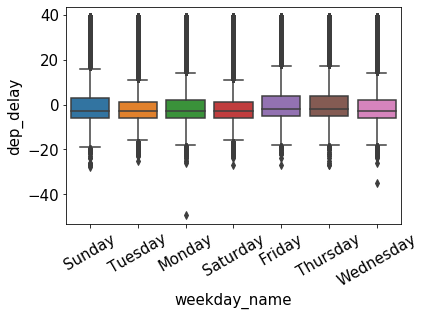

In [131]:
# visualize difference in weekday delays
wkday = sns.boxplot(data=noout_df, x='weekday_name', y='dep_delay')
wkday.set_xticklabels(wkday.get_xticklabels(), rotation=30);

## SARIMAX Modeling

In [94]:
import statsmodels.api as sm
import numpy as np
# fit SARIMA daily based on helper plots
sar = sm.tsa.statespace.SARIMAX(np.log(train_data), 
                                order=(0,1,1), 
                                seasonal_order=(0,1,0,52), 
                                trend='n').fit()
sar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                          dep_delay   No. Observations:                   95
Model:             SARIMAX(0, 1, 1)x(0, 1, 0, 52)   Log Likelihood                 -32.938
Date:                            Thu, 23 Jan 2020   AIC                             69.875
Time:                                    18:41:34   BIC                             73.351
Sample:                                01-01-2017   HQIC                            71.149
                                     - 10-21-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4507      0.123     -3.660      0.000      -0.692      -0.209
sigma2         0.2795      0.053      5.245      0.000       0.175       0.384
===================================================================================
Ljung-Box (Q):                       47.25   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.20   Prob(JB):                         0.54
Heteroskedasticity (H):               0.57   Skew:                             0.23
Prob(H) (two-sided):                  0.30   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
import statsmodels.api as sm
import numpy as np
# fit SARIMA daily based on helper plots
sar = sm.tsa.statespace.SARIMAX(np.log(train_data), 
                                order=(0,1,1), 
                                seasonal_order=(0,1,0,52), 
                                trend='n').fit()
sar.summary()

In [76]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [95]:
# mean absolute error - units are in minutes
metrics.mean_absolute_error(train_data['dep_delay'], sar.predict())

8.685284835164953

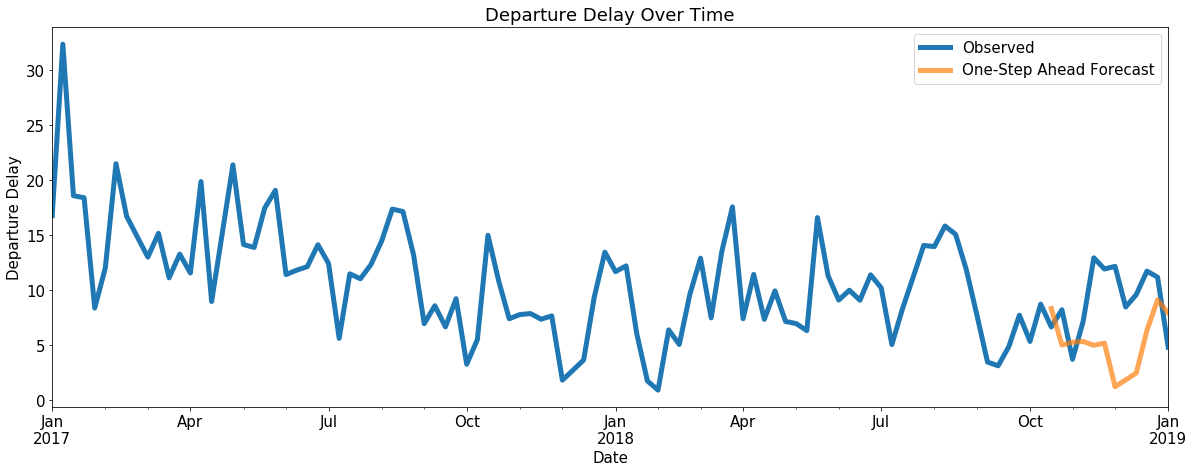

In [114]:
# visualize one-step ahead forecast
pred = np.exp(sar.predict(start='2018-10-21', end='2019-01-06'))
ax = total_data.plot(label='Observed', linewidth=5.0)
pred.plot(ax=ax, label='One-step ahead Forecast', alpha=.7,figsize=(20,7),linewidth=5.0)
ax.set_xlabel('Date')
ax.set_ylabel('Departure Delay')
plt.title('Departure Delay Over Time')
plt.legend(['Observed','One-Step Ahead Forecast'])
plt.rcParams.update({'font.size': 15})
plt.savefig('timeseries_pred.svg', format='svg', transparent=True)
plt.show()


In [143]:
# mean absolute error with test data - units in minutes
metrics.mean_absolute_error(test_data,pred)

4.850452149813701

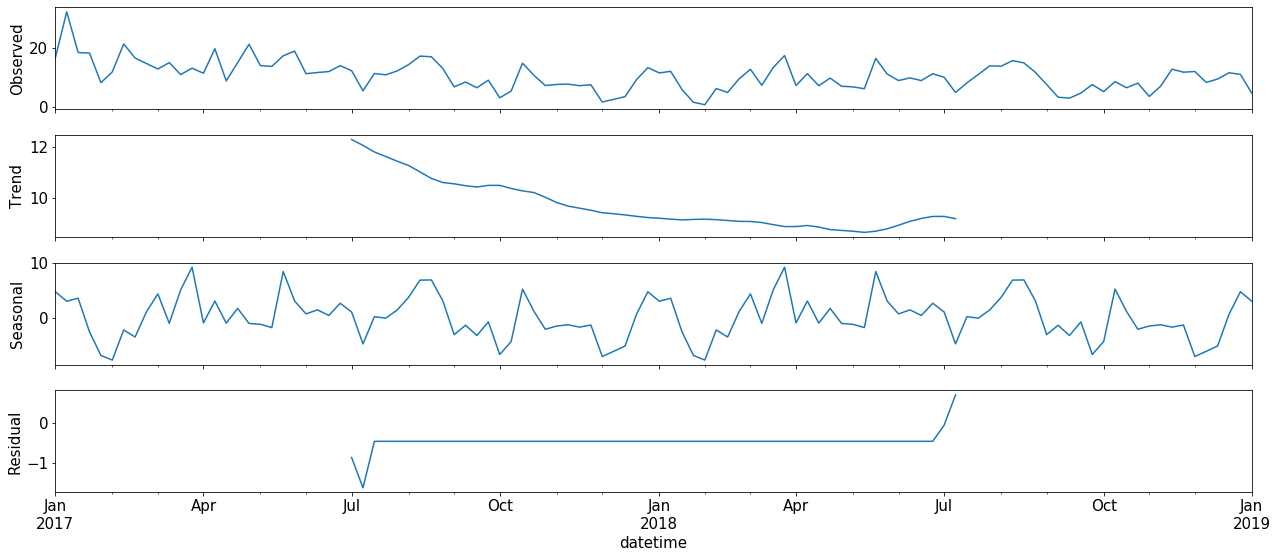

In [160]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(weekly_avg_delay, model='additive')
fig = decomposition.plot()
plt.rcParams.update({'font.size': 15})
plt.savefig('timeseries_decomp.svg', format='svg', transparent=True)
plt.show()


In [115]:
# create and run statistical tests on model
norm_val, norm_p, skew, kurtosis = sar.test_normality('jarquebera')[0]
lb_val, lb_p = sar.test_serial_correlation(method='ljungbox')[0]
het_val, het_p = sar.test_heteroskedasticity('breakvar')[0]
# we want to look at largest lag for Ljung-Box, so take largest number in series
# there's intelligence in the method to determine how many lags back to calculate this stat
lb_val = lb_val[-1]
lb_p = lb_p[-1]
durbin_watson = sm.stats.stattools.durbin_watson(sar.filter_results.standardized_forecasts_error[0, sar.loglikelihood_burn:])

print('Normality: val={:.3f}, p={:.3f}'.format(norm_val, norm_p));
print('Ljung-Box: val={:.3f}, p={:.3f}'.format(lb_val, lb_p));
print('Heteroskedasticity: val={:.3f}, p={:.3f}'.format(het_val, het_p));
print('Durbin-Watson: d={:.2f}'.format(durbin_watson))

Normality: val=1.235, p=0.539
Ljung-Box: val=47.245, p=0.201
Heteroskedasticity: val=0.569, p=0.303
Durbin-Watson: d=1.80
